# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

There was 52,944 records in the Portuguese dataset from 2008 to 2013. Only 6,557 of those records ended as a success  which was a 12.38% success rate.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [15]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [16]:
missing_values = df.isnull().sum()
missing_values

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Business Objective

The business objective of the task is to analyze the data, and run it through different models to decipher what features are important in seeing if a person would secure a term deposit. Another objective is to analyze model performances.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### Turning Month into Numberical

In [19]:
df_copy = df.copy()
month_to_num = { #turning month from string to numeric
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
        'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }
if df_copy['month'].dtype == 'object':#checks if month is a string
    df_copy['month_num'] = df_copy['month'].str.lower().map(month_to_num)
else:
    df_copy['month_num'] = df_copy['month']

df_copy.head()

hi


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_num
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5


### Adding age categories

In [20]:
#sorting age into different age groups
df_copy['age_group'] = pd.cut(df_copy['age'],
                                 bins=[0, 30, 40, 50, 60, 100],
                                 labels=['young', 'thirties', 'forties', 'fifties', 'senior'])
df_copy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_num,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5,fifties
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5,fifties
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5,thirties
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5,thirties
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5,fifties


In [21]:
df_copy['quarter'] = ((df_copy['month_num'] - 1) // 3) + 1 #adding what quarter the month is in

season_mapping = { #adding season to the dataset
    1: 'winter', 2: 'winter', 3: 'spring', 4: 'spring',
    5: 'spring', 6: 'summer', 7: 'summer', 8: 'summer',
    9: 'fall', 10: 'fall', 11: 'fall', 12: 'winter'
}
df_copy['season'] = df_copy['month_num'].map(season_mapping)

df_copy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_num,age_group,quarter,season
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,5,fifties,2,spring
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,5,fifties,2,spring
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,5,thirties,2,spring
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,5,thirties,2,spring
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,5,fifties,2,spring


In [22]:
#determining if the person has good credit or not
df_copy['has_credit'] = ((df_copy['housing'] == 'yes') |
                            (df_copy['loan'] == 'yes')).astype(int)
df_copy['credit_level'] = (df_copy['housing'] == 'yes').astype(int) + \
                          (df_copy['loan'] == 'yes').astype(int) + \
                          (df_copy['default'] == 'yes').astype(int)


df_copy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,y,month_num,age_group,quarter,season,has_credit,credit_level
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,5,fifties,2,spring,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,5,fifties,2,spring,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,5,thirties,2,spring,1,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,5,thirties,2,spring,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-36.4,4.857,5191.0,no,5,fifties,2,spring,1,1


In [23]:
#seeing if the day is a weekend. can have an effect on whether a person does a term deposit or not
df_copy['is_weekend'] = df_copy['day_of_week'].apply(
        lambda x: 1 if x.lower() in ['sat', 'sun'] else 0
    )

In [24]:
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','month_num','credit_level','has_credit','quarter','is_weekend']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome','season','age_group']

### Scaling

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer

In [26]:
numeric_transformer = Pipeline(steps=[ #numeric transformer and scaler
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False))
    ])
categorical_transformer = Pipeline(steps=[ #handling strings
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
    ])

In [27]:
preprocessor = ColumnTransformer(#main transformer
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [29]:
X = df_copy.drop(columns=['y','month']) #removing y (target) and month which I converted into numeric
y = df_copy['y']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,age,job,marital,education,default,housing,loan,contact,day_of_week,duration,...,cons.conf.idx,euribor3m,nr.employed,month_num,age_group,quarter,season,has_credit,credit_level,is_weekend
12556,40,blue-collar,married,basic.9y,unknown,yes,no,telephone,mon,94,...,-42.7,4.960,5228.1,7,thirties,3,summer,1,1,0
35451,31,admin.,married,university.degree,no,no,no,cellular,mon,116,...,-46.2,1.244,5099.1,5,thirties,2,spring,0,0,0
30592,59,retired,married,basic.4y,no,no,no,cellular,mon,13,...,-46.2,1.354,5099.1,5,fifties,2,spring,0,0,0
17914,43,housemaid,divorced,basic.9y,no,yes,no,cellular,tue,94,...,-42.7,4.961,5228.1,7,forties,3,summer,1,1,0
3315,39,admin.,single,high.school,unknown,no,no,telephone,thu,344,...,-36.4,4.860,5191.0,5,thirties,2,spring,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,retired,married,professional.course,unknown,no,no,telephone,tue,427,...,-36.4,4.857,5191.0,5,fifties,2,spring,0,0,0
11284,37,management,married,university.degree,no,no,no,telephone,thu,288,...,-41.8,4.961,5228.1,6,thirties,2,summer,0,0,0
38158,35,admin.,married,high.school,no,yes,no,cellular,thu,194,...,-26.9,0.754,5017.5,10,thirties,4,fall,1,1,0
860,40,management,married,university.degree,no,yes,no,telephone,wed,295,...,-36.4,4.856,5191.0,5,thirties,2,spring,1,1,0


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

I would say, the baseline performance that our classifier should beat would be logistic regression as it is a foundational model used to help people understand more complex models

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [31]:
from sklearn.linear_model import LogisticRegression
import time

In [32]:
model_selector_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
start = time.time()
model_selector_pipe.fit(X_train, y_train)
ends = time.time()
lg_train_time = ends - start

### Problem 9: Score the Model

What is the accuracy of your model?

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
y_pred = model_selector_pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) #getting score
accuracy

0.9134498664724447

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [125]:
#classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.45      0.54       935

    accuracy                           0.91      8238
   macro avg       0.80      0.71      0.75      8238
weighted avg       0.90      0.91      0.91      8238



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree,export_text


In [39]:
results = pd.DataFrame(columns=["Model", "TrainTime", "TrainAccuracy", "TestAccuracy"]) #dataframe to store model info

In [40]:
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])
start = time.time()
dt_pipeline.fit(X_train, y_train)
ends = time.time()
train_time = ends - start
train_time


2.828160285949707

In [41]:
train_pred = dt_pipeline.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
test_pred = dt_pipeline.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
new_row = pd.DataFrame({
        "Model": ['Decision Tree'],
        "TrainTime": [f"{train_time:.4f}s"],
        "TrainAccuracy": [f"{train_acc:.4f}"],
        "TestAccuracy": [f"{test_acc:.4f}"]
})
results = pd.concat([results, new_row], ignore_index=True)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
start = time.time()
knn_pipeline.fit(X_train, y_train)
ends = time.time()
train_time = ends - start

In [44]:
train_pred = knn_pipeline.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
test_pred = knn_pipeline.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
new_row = pd.DataFrame({
        "Model": ['KNN'],
        "TrainTime": [f"{train_time:.4f}s"],
        "TrainAccuracy": [f"{train_acc:.4f}"],
        "TestAccuracy": [f"{test_acc:.4f}"]
})
results = pd.concat([results, new_row], ignore_index=True)

In [45]:
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', svm.SVC())
])
start = time.time()
svm_pipeline.fit(X_train, y_train)
ends = time.time()
train_time = ends - start
train_time

45.44633936882019

In [46]:
train_pred = svm_pipeline.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
test_pred = svm_pipeline.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
new_row = pd.DataFrame({
        "Model": ['SVM'],
        "TrainTime": [f"{train_time:.4f}s"],
        "TrainAccuracy": [f"{train_acc:.4f}"],
        "TestAccuracy": [f"{test_acc:.4f}"]
})
results = pd.concat([results, new_row], ignore_index=True)

In [47]:
results

,Model,TrainTime,TrainAccuracy,TestAccuracy
0,Decision Tree,2.8282s,1.0000,0.8880
1,KNN,0.1342s,0.9313,0.8973
2,SVM,45.4463s,0.9194,0.9081


We see from the table above, KNN had the shortest training time which was expected as it looks at its nearest data points. It tracks the distance using a distance metric such as Manhattan, Euclidean, etc. The decision tree was second fastest. It is fast due to being a greedy algorithm which makes locally optimal decisions instead of globally optimal decisions. This makes the algorithm more computationally efficient. SVM has a long train time due to the train process being more computationally intensive. It has a time complexity of O(n^2) or more.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### **Should we keep the gender feature?**

Gender can have an impact on whether they would do a long term deposit or not, but it really depends on the assets they currently have at hand, such as savings, previous investments, job income, etc. Those features are important indicators oh whether they would do a long term deposit, regardless of their gender. There are possibilities of gender playing a bigger role in different regions of the world where gender roles do play a big part in who influences the family finances. Besides that scenario, gender feature wouldn't be needed.

### Other data

From the dataset, most of the features given are important, but the contact feature is one we can remove as it likely would not have a big impact on whether a person would do a long term deposit or not.

In [48]:
from sklearn.feature_selection import SelectKBest, f_classif,SelectFromModel
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [72]:
impr_results = pd.DataFrame(columns=["Model","Duration","TrainAccuracy", "TestAccuracy"]) #storing model info into a dataframe

In [50]:
lg_pipe = Pipeline([ #logistic regression pipe
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(f_classif)),
    ('classifier', LogisticRegression())
])

In [52]:
param_grid = { #logistic regression params
    'selector__k': [12, 15,20,'all'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [1000]
}

In [53]:
lg_grid = GridSearchCV( #logistic regression gridsearchcv
    estimator=lg_pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [ ]:
lg_grid_start = time.time() #getting training time
lg_grid.fit(X_train, y_train)
duration = time.time() - lg_grid_start

In [67]:
lg_train_pred = lg_grid.predict(X_train)
lg_train_acc = accuracy_score(y_train, lg_train_pred)
lg_test_pred = lg_grid.predict(X_test)
lg_test_acc = accuracy_score(y_test, lg_test_pred)

In [73]:
new_row = pd.DataFrame({
        "Model": ['Improved Logistic Regression'],
        "Duration": [f"{duration:.4f}s"],
        "TrainAccuracy": [f"{lg_train_acc:.4f}"],
        "TestAccuracy": [f"{lg_test_acc:.4f}"]
})
impr_results = pd.concat([impr_results, new_row], ignore_index=True)

In [112]:
lg_results = pd.DataFrame(lg_grid.cv_results_)

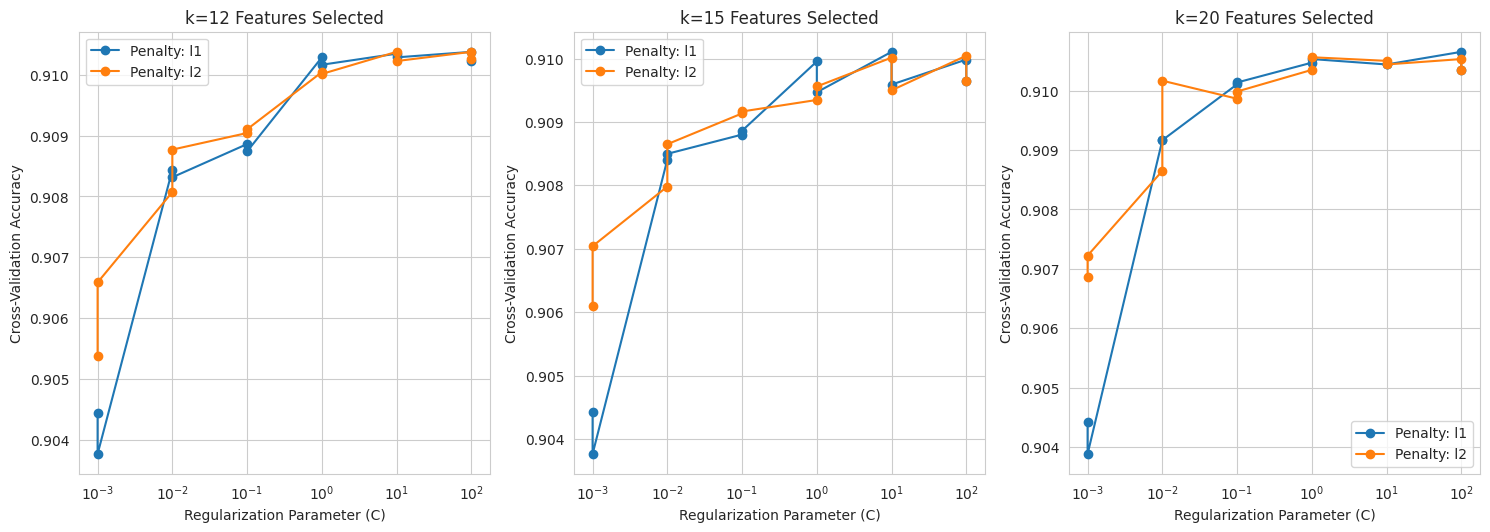

In [114]:
plt.figure(figsize=(15, 10))
for i, k in enumerate([12, 15, 20]):
    plt.subplot(2, 3, i+1)
    # Filtering results
    k_results = lg_results[lg_results['param_selector__k'] == k]

    for penalty in ['l1', 'l2']: #grouping by c value and penalty
        penalty_results = k_results[k_results['param_classifier__penalty'] == penalty]

        # Extract C values and corresponding mean test scores
        c_values = penalty_results['param_classifier__C'].astype(float)
        test_scores = penalty_results['mean_test_score']

        sorted_indices = c_values.argsort()
        c_values = c_values.iloc[sorted_indices]
        test_scores = test_scores.iloc[sorted_indices]

        plt.semilogx(c_values, test_scores, marker='o', label=f'Penalty: {penalty}')

    plt.title(f'k={k} Features Selected')
    plt.xlabel('Regularization Parameter (C)')
    plt.ylabel('Cross-Validation Accuracy')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Chart above shows the CV accuracy between L1 and L2 penalties

In [124]:
best_estimator = lg_grid.best_estimator_
preprocessor = best_estimator.named_steps['preprocessor']
selector = best_estimator.named_steps['selector']
feature_names = []
for name, transformer, columns in preprocessor.transformers_:
    if hasattr(transformer, 'get_feature_names_out'):
        feature_names.extend(transformer.get_feature_names_out(columns))


# Get the selected feature indices and their scores
selected_indices = selector.get_support(indices=True)
feature_scores = selector.scores_

selected_features_with_scores = [(feature_names[i], feature_scores[i]) for i in selected_indices
                                if not np.isnan(feature_scores[i])]

# sorting scores
selected_features_with_scores.sort(key=lambda x: x[1], reverse=True)

print("\nTop 20 selected features and their scores:")
for feature, score in selected_features_with_scores[:20]:
    print(f"- {feature}: {score:.4f}")


Top 20 selected features and their scores:
- duration: 6352.4508
- euribor3m nr.employed: 6042.1172
- nr.employed^2: 5279.4283
- emp.var.rate nr.employed: 5060.4296
- nr.employed: 4805.3327
- euribor3m^2: 4618.1492
- pdays^2: 3994.0147
- pdays: 3992.5918
- poutcome_success: 3726.6059
- emp.var.rate euribor3m: 3702.0317
- pdays nr.employed: 3562.3940
- euribor3m: 3478.8348
- pdays euribor3m: 3432.7688
- emp.var.rate: 3249.5177
- pdays previous: 2951.0527
- emp.var.rate^2: 2899.5636
- pdays emp.var.rate: 2844.2642
- previous: 1852.8554
- previous nr.employed: 1755.8662
- cons.conf.idx^2: 1661.4946


In [57]:
param_grid = {
    'select__k': [5, 10, 15, 20, 'all'],  # Number of features to select,
    'knn__n_neighbors': [30, 40, 50, 60, 75, 90, 100],
    'knn__weights': ['uniform', 'distance'],
    'knn__leaf_size': [20], #already ran this previously and got 20 as best leaf size
    'knn__metric': ['manhattan'] #ran this previously comparing with euclidean and cosine, model chose manhattan as best metric
}
bankKNN = Pipeline([
    ('preprocessor', preprocessor),
    ('select', SelectKBest(score_func=f_classif)),
    ('knn', KNeighborsClassifier())
])

In [58]:
knn_grid = GridSearchCV(estimator=bankKNN,
                        param_grid=param_grid,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1,
                        verbose=1,
                        error_score='raise'
                        )

In [ ]:
knn_grid_start = time.time() #time is a little skewed because i forgot to run it on the original fit below, so fit time is faster due to knowing what the previous fit chose
knn_grid.fit(X_train, y_train)
knn_grid_duration = time.time() - knn_grid_start

In [62]:
# knn_grid.fit(X_train, y_train) #old fit

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
                                                                          'nr.employed',
                                                                          'month_num',
                                                                          'cr...
                                                                          'age_group'])])),
                                       ('select', SelectKBest()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__leaf_size': [10, 20, 50, 100],
                         'knn__metric': ['euclidean', 'manhattan', 'cosine'],
                         'knn__n_neighbors': [3, 5, 7, 10, 15, 20, 25, 30, 40,
                                              50, 60, 75, 90, 100, 125, 150,
                                              175, 200, 225, 250],
                         'knn__weights': ['uniform', 'distance'],
                         'select__k': [5, 10, 15, 20, 'all']},
             scoring='accuracy', verbose=1)

In [130]:
best_estimator = knn_grid.best_estimator_

# Extract the SelectKBest step
select_step = best_estimator.named_steps['select']
feature_scores = select_step.scores_
preprocessor_step = best_estimator.named_steps['preprocessor']

#getting feature names
feature_names = preprocessor_step.get_feature_names_out()


#storing feature name and score in a dataframe
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': feature_scores
})

# Sortimportance score
feature_importance_df = feature_importance_df.sort_values('Score', ascending=False)


k = select_step.k
selected_features_df = feature_importance_df.head(k)
print(f"Top {k} selected features:")
print(selected_features_df)


Top 10 selected features:
                           Feature        Score
1                    num__duration  6352.450769
108     num__euribor3m nr.employed  6042.117173
114             num__nr.employed^2  5279.428302
84   num__emp.var.rate nr.employed  5060.429585
9                 num__nr.employed  4805.332692
107               num__euribor3m^2  4618.149245
57                    num__pdays^2  3994.014701
3                       num__pdays  3992.591820
177          cat__poutcome_success  3726.605878
83     num__emp.var.rate euribor3m  3702.031740


<ipython-input-131-fe2b90155ddf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


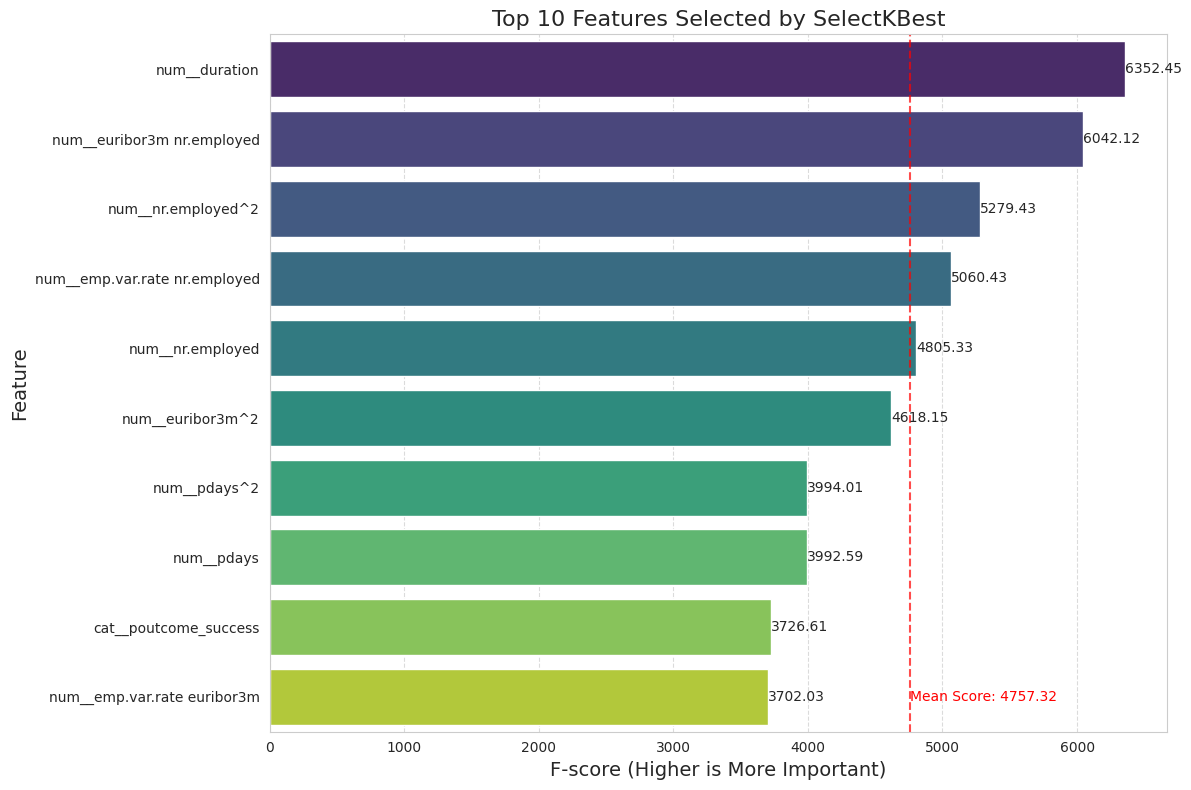

In [131]:
#creating a bar plot of the important features
selected_features_df = feature_importance_df.head(k)
plot_df = selected_features_df
title = f'Top {k} Features Selected by SelectKBest'
plt.figure(figsize=(12, 8))

ax = sns.barplot(
    x='Score',
    y='Feature',
    data=plot_df,
    palette='viridis'
)

plt.title(title, fontsize=16)
plt.xlabel('F-score (Higher is More Important)', fontsize=14)
plt.ylabel('Feature', fontsize=14)

for i, v in enumerate(plot_df['Score']):
    ax.text(v + 0.1, i, f"{v:.2f}", va='center')

if len(plot_df) > 1:
    threshold = plot_df['Score'].mean()
    plt.axvline(x=threshold, color='red', linestyle='--', alpha=0.7)
    plt.text(threshold + 0.1, len(plot_df)-1, f'Mean Score: {threshold:.2f}',color='red', va='center')

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#getting model stats
knn_train_pred = knn_grid.predict(X_train)
knn_train_acc = accuracy_score(y_train, knn_train_pred)
knn_test_pred = knn_grid.predict(X_test)
knn_test_acc = accuracy_score(y_test, knn_test_pred)

In [74]:
new_row = pd.DataFrame({
        "Model": ['Improved KNN'],
        "Duration": [f"{knn_grid_duration:.4f}s"],
        "TrainAccuracy": [f"{knn_train_acc:.4f}"],
        "TestAccuracy": [f"{knn_test_acc:.4f}"]
})
impr_results = pd.concat([impr_results, new_row], ignore_index=True)

In [99]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)

Classification Report:
              precision    recall  f1-score     support
no             0.939158  0.959606  0.949272  7303.00000
yes            0.619845  0.514439  0.562244   935.00000
accuracy       0.909080  0.909080  0.909080     0.90908
macro avg      0.779502  0.737022  0.755758  8238.00000
weighted avg   0.902917  0.909080  0.905345  8238.00000


In [62]:
bankDT = Pipeline([ #decision tree pipe
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('dtree', DecisionTreeClassifier())
])
dt_param_grid = {
    'feature_selection__k': [5,10,15,20,'all'], #SelectKBest param
    'dtree__criterion': ['gini', 'entropy'],
    'dtree__max_depth': [20,22,25,30,35,40],
    'dtree__min_samples_split': [20],
    'dtree__min_samples_leaf': [5, 10, 20,30,40],
    'dtree__max_features': ['log2'],
    'dtree__class_weight': ['balanced', None]
}

In [63]:
dt_grid = GridSearchCV( #decision tree gridsearchcv
    bankDT,
    param_grid=dt_param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

In [ ]:
dt_grid_start = time.time() #getting the duration time from the decision tree fit
dt_grid.fit(X_train, y_train)
dt_grid_duration = time.time() - dt_grid_start

In [75]:
# dt_grid.fit(X_train, y_train) old DT fit

Fitting 5 folds for each of 5600 candidates, totalling 28000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
                                                                          'nr.employed',
                                                                          'month_num',
                                                                          'credit_level',
                                                                          'has_cre...
                                       ('dtree', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dtree__class_weight': ['balanced', None],
                         'dtree__criterion': ['gini', 'entropy'],
                         'dtree__max_depth': [15, 20, 30, 50, 70, 90, None],
                         'dtree__max_features': ['sqrt', 'log2'],
                         'dtree__min_samples_leaf': [5, 10, 20, 30, 40],
                         'dtree__min_samples_split': [10, 20, 50, 80],
                         'feature_selection__k': [5, 10, 15, 20, 'all']},
             scoring='accuracy', verbose=1)

In [70]:
#getting model stats
dt_train_pred = dt_grid.predict(X_train)
dt_train_acc = accuracy_score(y_train, dt_train_pred)
dt_test_pred = dt_grid.predict(X_test)
dt_test_acc = accuracy_score(y_test, dt_test_pred)

In [75]:
new_row = pd.DataFrame({
        "Model": ['Improved DT'],
        "Duration": [f"{dt_grid_duration:.4f}s"],
        "TrainAccuracy": [f"{dt_train_acc:.4f}"],
        "TestAccuracy": [f"{dt_test_acc:.4f}"]
})
impr_results = pd.concat([impr_results, new_row], ignore_index=True)
impr_results

,Model,Duration,TrainAccuracy,TestAccuracy
0,Improved Logistic Regression,2383.7926s,0.9154,0.9155
1,Improved KNN,399.3780s,0.9178,0.9120
2,Improved DT,158.4452s,0.9177,0.9084


In [77]:
best_pipeline = dt_grid.best_estimator_
dtree = best_pipeline.named_steps['dtree']

In [85]:
# Get feature names
preprocessed_features = best_pipeline.named_steps['preprocessor'].get_feature_names_out()
feature_selector = best_pipeline.named_steps['feature_selection']
selected_mask = feature_selector.get_support()
selected_indices = np.where(selected_mask)[0]
selected_features = [preprocessed_features[i] for i in selected_indices]

plt.figure(figsize=(50, 30))
plot_tree(
    dtree,
    feature_names=selected_features,
    class_names=[str(c) for c in dtree.classes_],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=None,
    proportion=True,
    precision=2
)
plt.title("Full Decision Tree", fontsize=20)
plt.tight_layout()
plt.savefig('full_decision_tree.png', dpi=300, bbox_inches='tight')
print("Saved full tree visualization to 'full_decision_tree.png'")

Output hidden; open in https://colab.research.google.com to view.

This is the decision tree  for the model. It is too big to fully show

In [134]:
feature_importances = dtree.feature_importances_

# Dataframe storing the selected faetures and importance scores
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True) #sorting importance scores

# Print the importance scores
print("Feature Importance Ranking:")
for i, row in importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

Feature Importance Ranking:
num__duration: 0.4378
num__nr.employed^2: 0.3787
num__emp.var.rate euribor3m: 0.0773
cat__poutcome_success: 0.0512
num__euribor3m nr.employed: 0.0380
num__euribor3m^2: 0.0099
num__pdays: 0.0037
num__emp.var.rate nr.employed: 0.0016
num__pdays^2: 0.0013
num__nr.employed: 0.0006


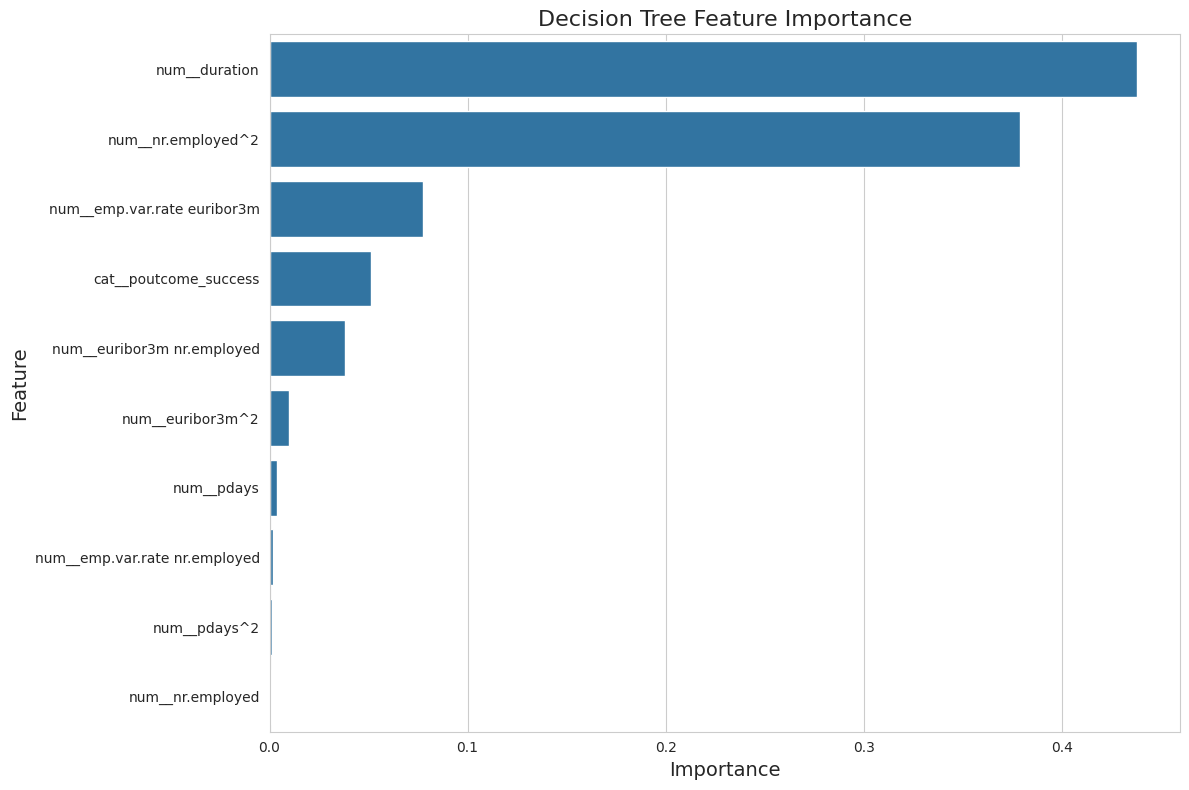

In [135]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Decision Tree Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

We see that the duration plays an important role in the features chosen. This can tell us that maybe the more or longer a person is in contact with a customer, it can possibly result in them making a term deposit. Their employment status and the number of days since their previous contact also plays a decent role.

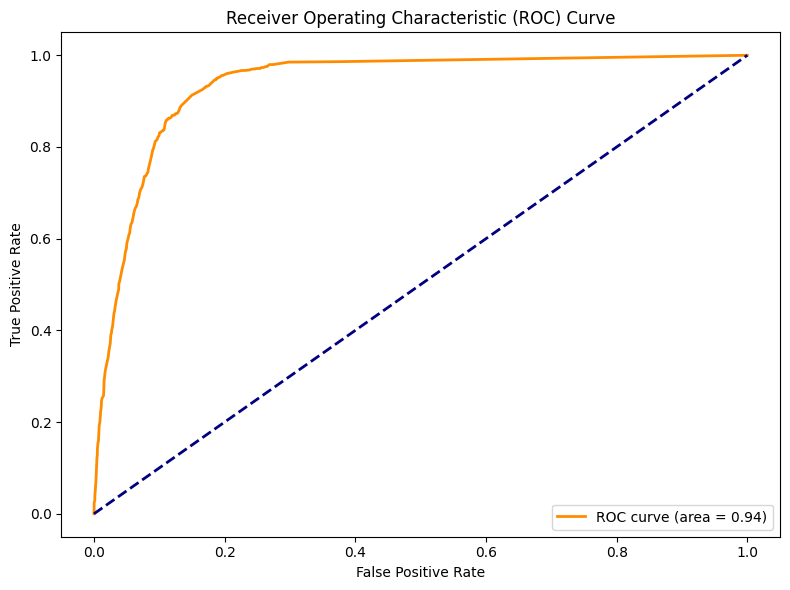

In [95]:
#getting ROC Curve of Decision Tree Model
y_scores = dt_grid.predict_proba(X_test)[:, 1]
y_test_numeric = y_test.map({'no': 0, 'yes': 1})
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

We see in this ROC Curve for the Decision Tree, that it shows our model being fairly accurate, with the curve area at 0.94

In [80]:
svm_pipeline = Pipeline(steps=[ #SVM pipeline
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('svm', svm.SVC(probability=True))
])

svm_param_grid = { #SVM gridsearch params
    'feature_selection__k': [10, 12,20],
    'svm__C': [100,120,130],
    'svm__gamma': ['auto', 0.01,0.1],
    'svm__kernel': ['rbf']
}

In [81]:
svm_grid = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

In [ ]:
svm_grid_start = time.time() #fitting svm model and getting fitting time
svm_grid.fit(X_train, y_train)
svm_grid_duration = time.time() - svm_grid_start

In [92]:
# svm_grid.fit(X_train, y_train) #old svm fit

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
                                                                          'nr.employed',
                                                                          'month_num',
                                                                          'credit_level',
                                                                          'has_cre...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'day_of_week',
                                                                          'poutcome',
                                                                          'season',
                                                                          'age_group'])])),
                                       ('feature_selection', SelectKBest()),
                                       ('svm', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [10, 12, 20],
                         'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [83]:
#getting model stats
svm_train_pred = svm_grid.predict(X_train)
svm_train_acc = accuracy_score(y_train, svm_train_pred)
svm_test_pred = svm_grid.predict(X_test)
svm_test_acc = accuracy_score(y_test, svm_test_pred)

In [100]:
svm_train_acc

0.9159028831562974

In [84]:
new_row = pd.DataFrame({
        "Model": ['Improved SVM'],
        "Duration": [f"{svm_grid_duration:.4f}s"],
        "TrainAccuracy": [f"{svm_train_acc:.4f}"],
        "TestAccuracy": [f"{svm_test_acc:.4f}"]
})
impr_results = pd.concat([impr_results, new_row], ignore_index=True)
impr_results

,Model,Duration,TrainAccuracy,TestAccuracy
0,Improved Logistic Regression,2383.7926s,0.9154,0.9155
1,Improved KNN,399.3780s,0.9178,0.9120
2,Improved DT,158.4452s,0.9177,0.9084
3,Improved SVM,1848.5441s,0.9159,0.9132


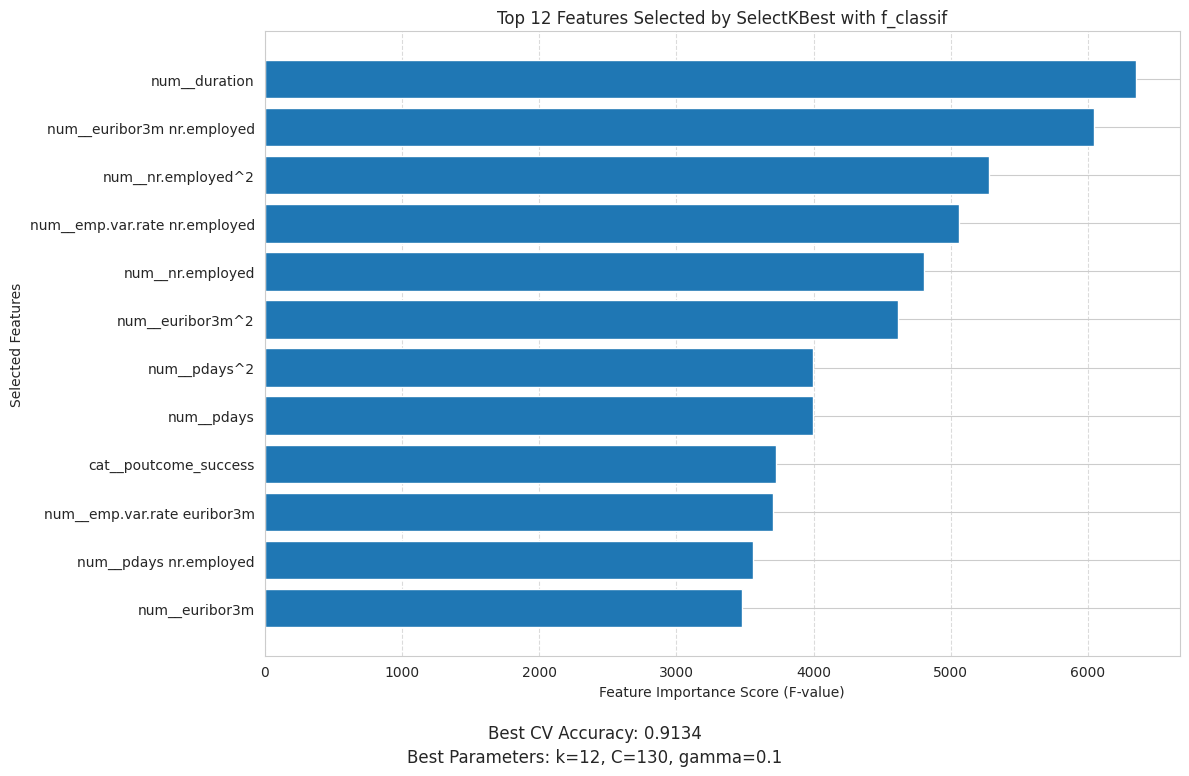


Selected Features Ranked by Importance:
1. num__euribor3m: 3478.8348
2. num__pdays nr.employed: 3562.3940
3. num__emp.var.rate euribor3m: 3702.0317
4. cat__poutcome_success: 3726.6059
5. num__pdays: 3992.5918
6. num__pdays^2: 3994.0147
7. num__euribor3m^2: 4618.1492
8. num__nr.employed: 4805.3327
9. num__emp.var.rate nr.employed: 5060.4296
10. num__nr.employed^2: 5279.4283
11. num__euribor3m nr.employed: 6042.1172
12. num__duration: 6352.4508


In [142]:
best_estimator = svm_grid.best_estimator_
feature_selector = best_estimator.named_steps['feature_selection']
preprocessor = best_estimator.named_steps['preprocessor']
#getting feature names
feature_names_out = preprocessor.get_feature_names_out()
feature_scores = feature_selector.scores_
selected_indices = feature_selector.get_support(indices=True)
# storing feature scores
selected_features = pd.DataFrame({
    'Feature': feature_names_out[selected_indices],
    'Score': feature_scores[selected_indices]
})
# Sort by importance
selected_features = selected_features.sort_values('Score', ascending=True)
# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
plt.barh(selected_features['Feature'], selected_features['Score'])
# Adding labels
plt.xlabel('Feature Importance Score (F-value)')
plt.ylabel('Selected Features')
k_value = best_estimator.named_steps['feature_selection'].k
plt.title(f'Top {k_value} Features Selected by SelectKBest with f_classif')
plt.grid(axis='x', linestyle='--', alpha=0.7)
# showing best params and its scores
best_params = svm_grid.best_params_
params_text = (f"Best Parameters: k={best_params['feature_selection__k']}, "
              f"C={best_params['svm__C']}, gamma={best_params['svm__gamma']}")
plt.figtext(0.5, 0.01, params_text, ha='center', fontsize=12)

best_score = svm_grid.best_score_
plt.figtext(0.5, 0.04, f"Best CV Accuracy: {best_score:.4f}", ha='center', fontsize=12)
plt.tight_layout(rect=[0, 0.07, 1, 0.97])
plt.show()
print("\nSelected Features Ranked by Importance:")
for i, (feature, score) in enumerate(zip(selected_features['Feature'], selected_features['Score'])):
    print(f"{i+1}. {feature}: {score:.4f}")

Text(50.722222222222214, 0.5, 'C value')

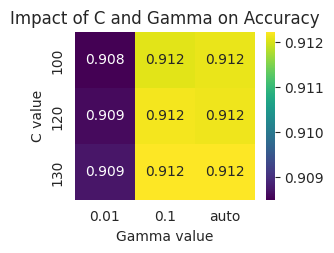

In [99]:
results = pd.DataFrame(svm_grid.cv_results_)
plt.subplot(2, 2, 3)
# Handle 'auto' in gamma values by converting all to string
results['param_svm__gamma_str'] = results['param_svm__gamma'].astype(str)
pivot_C_gamma = pd.pivot_table(results, values='mean_test_score',
                              index='param_svm__C',
                              columns='param_svm__gamma_str')
sns.heatmap(pivot_C_gamma, annot=True, fmt='.3f', cmap='viridis')
plt.title('Impact of C and Gamma on Accuracy')
plt.xlabel('Gamma value')
plt.ylabel('C value')

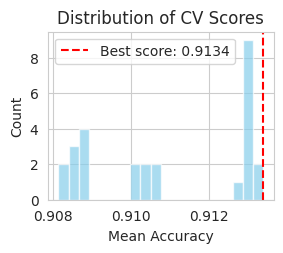

In [100]:
plt.subplot(2, 2, 1)
plt.hist(results['mean_test_score'], bins=20, alpha=0.7, color='skyblue')
plt.axvline(svm_grid.best_score_, color='red', linestyle='--',
           label=f'Best score: {svm_grid.best_score_:.4f}')
plt.title('Distribution of CV Scores')
plt.xlabel('Mean Accuracy')
plt.ylabel('Count')
plt.legend()

Text(321.26767676767673, 0.5, 'Number of features (k)')

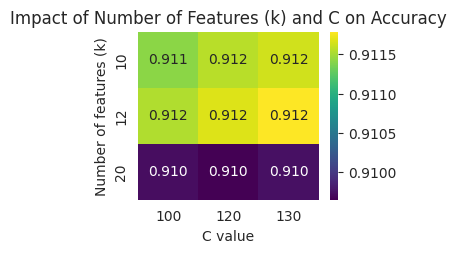

In [101]:
plt.subplot(2, 2, 2)
pivot_k_C = pd.pivot_table(results, values='mean_test_score',
                          index='param_feature_selection__k',
                          columns='param_svm__C')
sns.heatmap(pivot_k_C, annot=True, fmt='.3f', cmap='viridis')
plt.title('Impact of Number of Features (k) and C on Accuracy')
plt.xlabel('C value')
plt.ylabel('Number of features (k)')

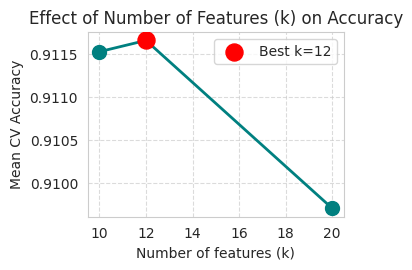

In [102]:
plt.subplot(2, 2, 4)
k_scores = results.groupby('param_feature_selection__k')['mean_test_score'].mean()
plt.plot(k_scores.index, k_scores.values, marker='o', linestyle='-', linewidth=2, markersize=10, color='teal')
plt.scatter(best_params['feature_selection__k'],
           results[results['param_feature_selection__k'] == best_params['feature_selection__k']]['mean_test_score'].mean(),
           color='red', s=150, zorder=5, label=f"Best k={best_params['feature_selection__k']}")
plt.title('Effect of Number of Features (k) on Accuracy')
plt.xlabel('Number of features (k)')
plt.ylabel('Mean CV Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

In [143]:
impr_results

,Model,Duration,TrainAccuracy,TestAccuracy
0,Improved Logistic Regression,2383.7926s,0.9154,0.9155
1,Improved KNN,399.3780s,0.9178,0.9120
2,Improved DT,158.4452s,0.9177,0.9084
3,Improved SVM,1848.5441s,0.9159,0.9132


Looking at the table above, we see that Training the Decision Tree was the fastest , followed by KNN, SVM and Logistic Regression. The KNN and SVM training time is a little bit skewed due to me not adding the time variables to track the time. In reality, it would have been DT > KNN > LG > SVM.
Looking at the charts above, the models have shown good accuracy from the chosen features and params from the gridsearchcv

##### Questions